In [40]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [41]:
from datetime import datetime
today = datetime.now().strftime("%m%d%y")

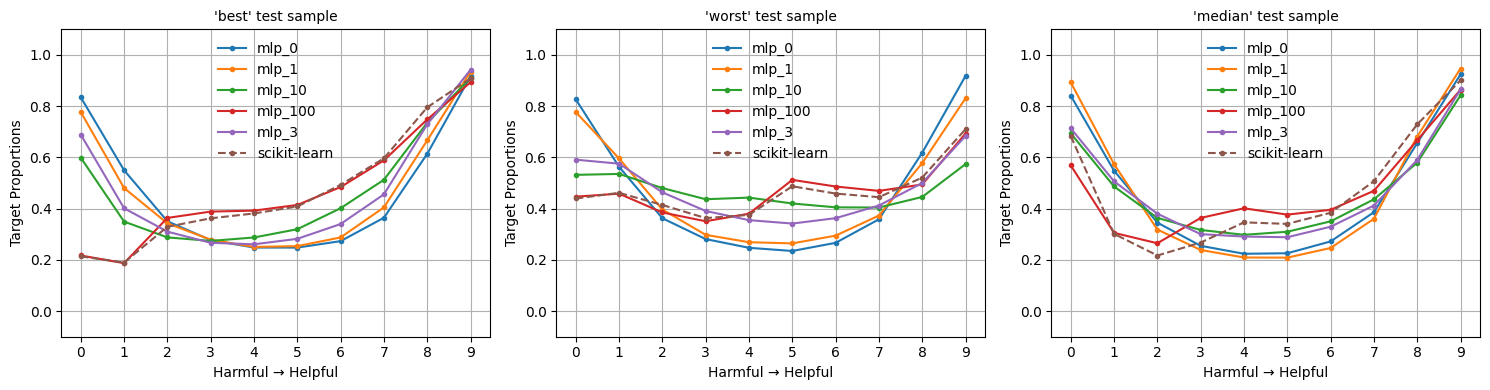

In [230]:
cs = pd.read_csv(f"./saved_data/chunk_stats_0_1_123__{today}.csv")
# cs["epoch"] = cs["epoch"].apply(lambda x: f"mlp_{int(x)}" if not np.isnan(x) else "scikit-learn")
# cs = cs[~cs["epoch"].isin(["mlp_10"])].copy() ## weird sample

stats_mean = cs.drop("round", axis=1).groupby(["epoch", "class_label"]).mean(numeric_only=True)
stats_std  = cs.drop("round", axis=1).groupby(["epoch", "class_label"]).std(numeric_only=True)

# best / median / worst
_, axes = plt.subplots(ncols=3, figsize=(15,4))

class_labels = ["best", "worst", "median"]
for i, class_label in enumerate(class_labels):
    _mean = stats_mean.xs(class_label, level="class_label")
    _std  = stats_std.xs(class_label, level="class_label")
    
    for epoch in _mean.index:
        ls = "--" if epoch == "scikit-learn" else "-"
        axes[i].plot(np.arange(10), _mean.loc[epoch], label=epoch, ls=ls, marker="o", markersize=3)
        # axes[i].errorbar(np.arange(10), _mean.loc[epoch], _std.loc[epoch], label=epoch)

    axes[i].set_title(f"'{class_label}' test sample", fontsize=10)
    axes[i].set_xlabel("Harmful → Helpful")
    axes[i].set_ylabel("Target Proportions")
    axes[i].set_xticks(np.arange(10))
    axes[i].set_ylim(-0.1,1.1)
    axes[i].legend(frameon=False)
    axes[i].grid()

plt.tight_layout()
plt.savefig("imgs/chunk_stats_0_1_123__092324.png")

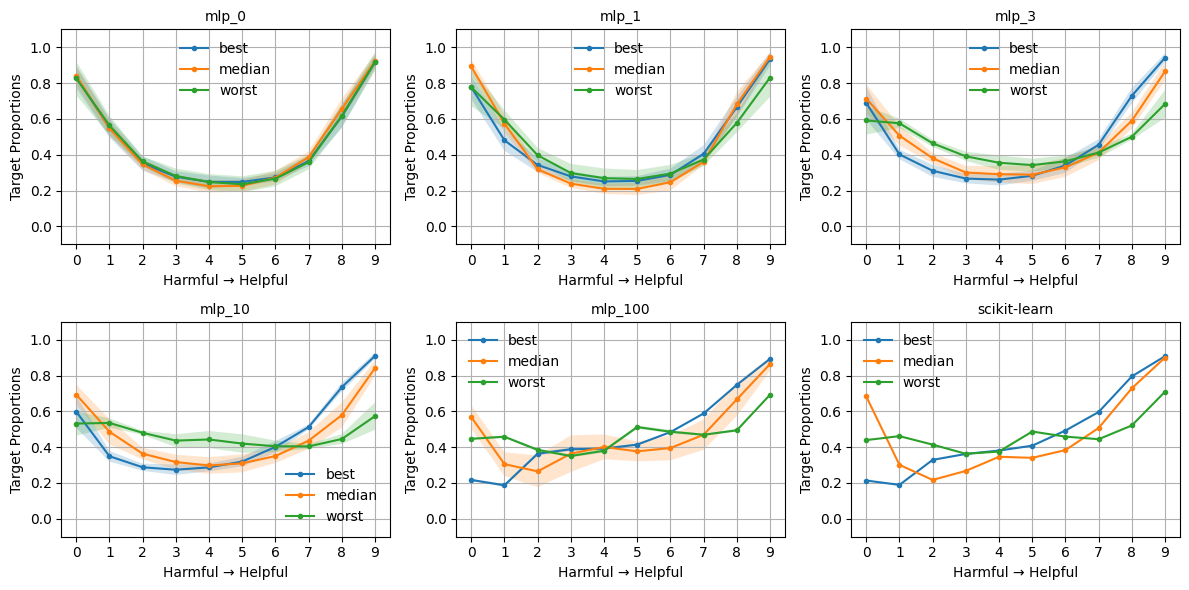

In [225]:
epoch_labels = cs["epoch"].unique().tolist()
epoch_labels = epoch_labels[1:] + [epoch_labels[0]]
# print(epoch_labels)
_, axes = plt.subplots(ncols=len(epoch_labels)//2, nrows=2, figsize=(12,6))
axes = axes.flat

for i, epoch_label in enumerate(epoch_labels):
    _mean = stats_mean.xs(epoch_label, level="epoch")
    _std  = stats_std.xs(epoch_label, level="epoch")

    for class_label in _mean.index:
        axes[i].plot(np.arange(10), _mean.loc[class_label], label=class_label, marker="o", markersize=3)
        # axes[i].errorbar(np.arange(10), _mean.loc[class_label], _std.loc[class_label], label=class_label, marker="o", markersize=3)
        lb = _mean.loc[class_label] - _std.loc[class_label]
        ub = _mean.loc[class_label] + _std.loc[class_label]
        axes[i].fill_between(np.arange(10), lb, ub, alpha=.2)
    
    axes[i].set_title(f"{epoch_label}", fontsize=10)
    axes[i].set_xlabel("Harmful → Helpful")
    axes[i].set_ylabel("Target Proportions")
    axes[i].set_xticks(np.arange(10))
    axes[i].set_ylim(-0.1,1.1)
    axes[i].legend(frameon=False)
    axes[i].grid()

plt.tight_layout()
plt.savefig("imgs/chunk_stats_0_1_123__092324_2.png")

In [227]:
qt = pd.read_csv(f"./saved_data/quantile_stats_0_1_123__{today}.csv")
# qt = pd.read_csv(f"quantile_stats_0_0.01__092324.csv")
# qt["epoch"] = qt["epoch"].apply(lambda x: f"mlp_{int(x)}" if not np.isnan(x) else "scikit-learn") 

display(qt)

# normalize
for x in qt:
    if x.startswith("quantile"):
        qt[x] = qt[x] / qt["quantile_10"] 
        
qt.drop(["quantile_0", "quantile_10"], axis=1, inplace=True)
# display(qt)

qt_stats = qt.drop("round", axis=1).groupby(["epoch", "class_label"]).mean()

,epoch,class_label,round,quantile_0,quantile_1,quantile_2,quantile_3,quantile_4,quantile_5,quantile_6,quantile_7,quantile_8,quantile_9,quantile_10
0,scikit-learn,worst,0,-0.017392,-2.806848e-04,-1.287139e-04,-6.736039e-05,-3.279974e-05,-6.577877e-06,1.656122e-05,4.635537e-05,9.700676e-05,2.217352e-04,0.014849
1,scikit-learn,best,0,-0.000009,-4.564618e-08,-7.327911e-09,9.152656e-09,2.189507e-08,3.494363e-08,5.261282e-08,7.834738e-08,1.265400e-07,2.563991e-07,0.000004
2,scikit-learn,median,0,-0.000277,-2.727088e-06,-1.043454e-06,-3.734058e-07,1.094408e-07,5.180800e-07,9.829694e-07,1.634775e-06,2.798113e-06,5.988514e-06,0.000140
3,mlp_0,best,0,-0.005482,-6.715170e-04,-3.868504e-04,-2.479761e-04,-1.445694e-04,-5.508435e-05,3.597927e-05,1.386745e-04,2.820241e-04,5.714199e-04,0.011713
4,mlp_0,worst,0,-0.004533,-6.617520e-04,-3.353172e-04,-1.546155e-04,-2.433005e-05,8.972782e-05,2.019658e-04,3.361578e-04,5.552855e-04,1.081104e-03,0.010741
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,mlp_10,worst,9,-0.008900,-3.492996e-04,-1.842514e-04,-1.019500e-04,-4.338905e-05,7.375709e-06,5.830948e-05,1.171121e-04,1.974847e-04,3.580178e-04,0.013072
149,mlp_10,median,9,-0.000744,-6.754566e-05,-4.040870e-05,-2.430686e-05,-1.130241e-05,4.104626e-07,1.406480e-05,3.078235e-05,5.613744e-05,1.088024e-04,0.001134
150,mlp_100,best,9,-0.000009,-4.924251e-08,-9.988711e-09,6.108417e-09,1.756249e-08,3.009232e-08,4.623123e-08,7.084604e-08,1.161166e-07,2.416899e-07,0.000004
151,mlp_100,worst,9,-0.018339,-2.957103e-04,-1.319599e-04,-6.712316e-05,-3.156008e-05,-3.956581e-06,1.911304e-05,4.926004e-05,9.981848e-05,2.356776e-04,0.013797


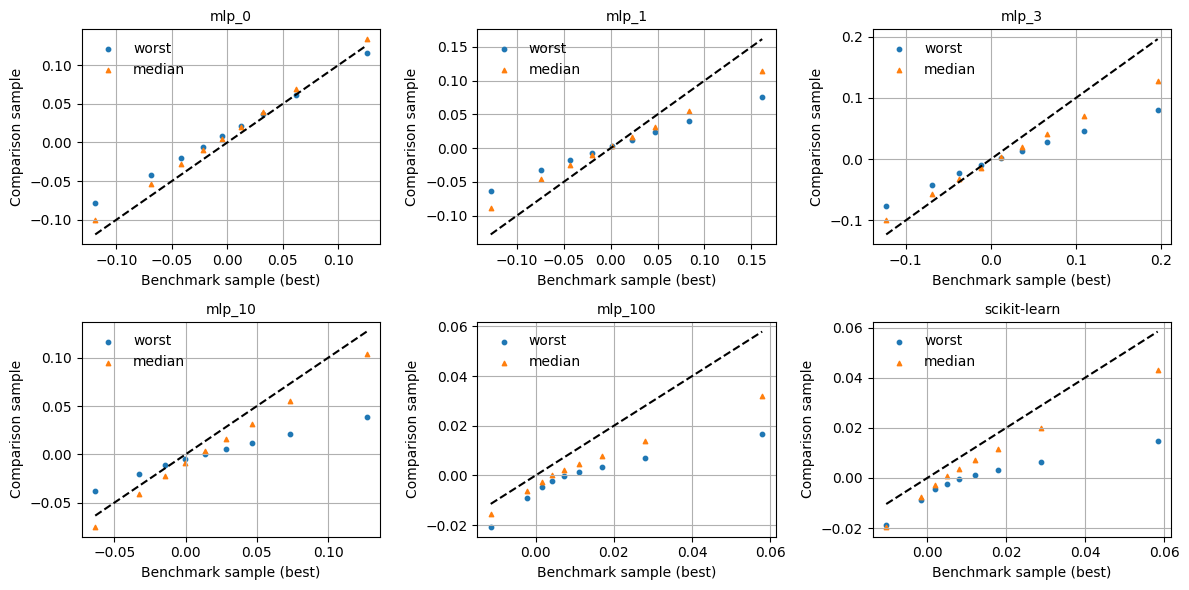

In [233]:
epoch_labels = qt["epoch"].unique().tolist()
epoch_labels = epoch_labels[1:] + [epoch_labels[0]]

_, axes = plt.subplots(ncols=len(epoch_labels)//2, nrows=2, figsize=(12,6))
axes = axes.flat

for i, epoch_label in enumerate(epoch_labels):
    tmp = pd.concat([
        qt_stats.loc[(epoch_label,"best")],
        qt_stats.loc[(epoch_label,"median")],
        qt_stats.loc[(epoch_label,"worst")],
    ], axis=1)[epoch_label]

    tmp.plot.scatter(x="best", y="worst", label="worst", s=10, ax=axes[i])
    tmp.plot.scatter(x="best", y="median", label="median", s=10, c="C1", marker="^", ax=axes[i])
    axes[i].plot(tmp["best"], tmp["best"], ls="--", c="k")
    axes[i].grid()
    axes[i].legend(frameon=False)
    axes[i].set_title(epoch_label, fontsize=10)
    axes[i].set_xlabel("Benchmark sample (best)")
    axes[i].set_ylabel("Comparison sample")

plt.tight_layout()
plt.savefig("imgs/quantile_stats_0_1_123__092324.png")

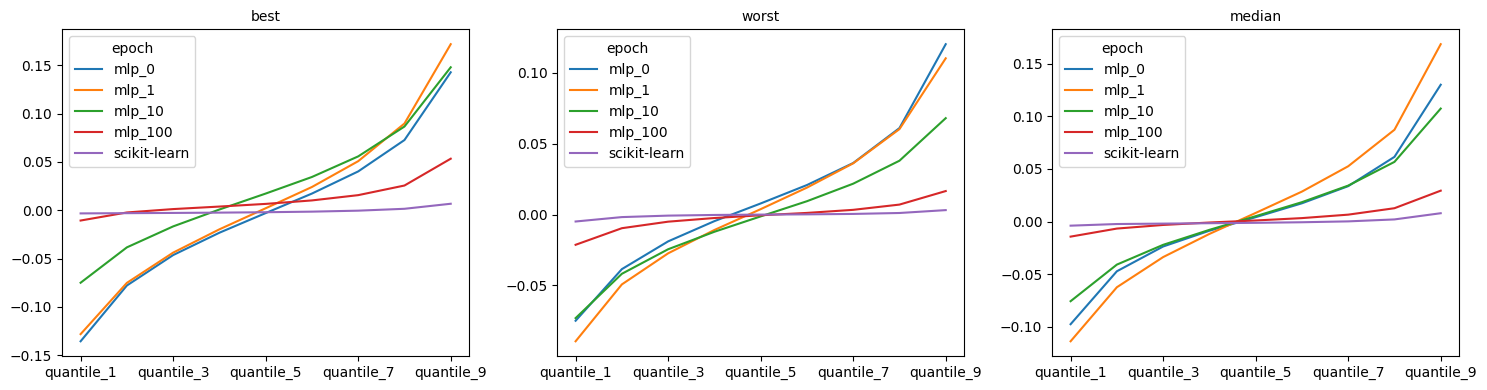

In [166]:
# kind of the sample plot below...
# class_labels = qt["class_label"].unique()
class_labels = ["best", "worst", "median"]

_, axes = plt.subplots(ncols=len(class_labels), figsize=(15,4))

for i, class_label in enumerate(class_labels):
    tmp = qt_stats.xs(class_label, level="class_label")
    benchmark = tmp.loc["scikit-learn"]
    # tmp_df = tmp / benchmark.abs() 
    # tmp_df.T.plot(ax=axes[i])
    tmp.T.plot(ax=axes[i])
    axes[i].set_title(class_label, fontsize=10)

plt.tight_layout();